<a href="https://colab.research.google.com/github/XalilovaMavluda/8-sinfcms/blob/main/BlokcheynBashorat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
df = pd.read_csv(csv_path, parse_dates=['Date'])
cols = [1] 
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)
ax = df.plot(x='Date', y='Close');
ax.set_xlabel('Y i l l a r')
ax.set_ylabel('Narx')
df = df.rename(columns = {'Date' : 'Date', 'Closing Price (USD)' : 'Close'})
scaler = MinMaxScaler()
close_price = df.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)
def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = \
preprocess(scaled_close, SEQ_LEN, train_split = 0.80)
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
 input_shape=(99,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
 dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.2))
model.add(layers.Dense(units=1))
model.summary()
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)
BATCH_SIZE = 64
history = model.fit(
 X_train, 
 y_train, 
 epochs=5, 
 batch_size=BATCH_SIZE, 
 shuffle=False,
 validation_split=0.1
)
model.evaluate(X_test, y_test)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
y_hat = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
 
plt.plot(y_test_inverse, label='Xaqiqiy narx', color='green')
plt.plot(y_hat_inverse, label='Bashorat qilingan narx', color='orange')
 
plt.title('Bitcoin price prediction LSTM')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show();







In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
df = pd.read_csv(csv_path, parse_dates=['Date'])
cols = [1] 
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)

,Date,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07921,0.06634,0.07921,0.07921,42
5,2010-07-21,0.08181,0.05050,0.05050,0.05050,129
6,2010-07-22,0.06767,0.05050,0.06262,0.06262,141
7,2010-07-23,0.06161,0.05049,0.05454,0.05454,26
8,2010-07-24,0.05941,0.05050,0.05050,0.05050,85
9,2010-07-25,0.05600,0.05000,0.05600,0.05600,46


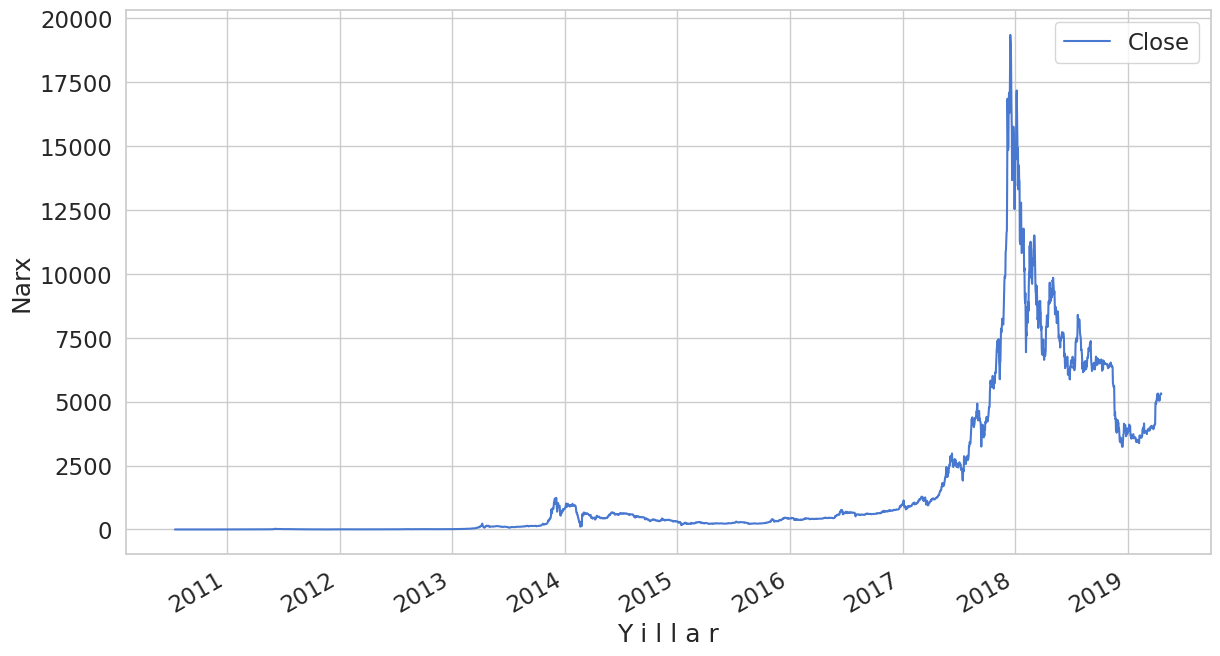

In [2]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel('Y i l l a r')
ax.set_ylabel('Narx')
df = df.rename(columns = {'Date' : 'Date', 'Closing Price (USD)' : 'Close'})

In [8]:
scaler = MinMaxScaler()
close_price = df.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)
SEQ_LEN = 100
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)
def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])
    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]
    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]
    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = \
preprocess(scaled_close, SEQ_LEN, train_split = 0.80)
model = tf.keras.Sequential()
model.add(layers.LSTM(units=32, return_sequences=True,
 input_shape=(99,1), dropout=0.2))
model.add(layers.LSTM(units=32, return_sequences=True,
 dropout=0.2))
model.add(layers.LSTM(units=32, dropout=0.1))
model.add(layers.Dense(units=1))
model.summary()
model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 99, 32)            4352      
                                                                 
 lstm_4 (LSTM)               (None, 99, 32)            8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
78/78 [==============================] - 11s 148ms/step - loss: 7.2573e-05 - val_loss: 5.3922e-04
Epoch 2/5
78/78 [==============================] - 10s 133ms/step - loss: 4.5257e-05 - val_loss: 3.9773e-04
Epoch 3/5
78/78 [==============================] - 6s 78ms/step - loss: 7.8316e-05 - val_loss: 5.3582e-04
Epoch 4/5
78/78 [==============================] - 7s 86ms/step - loss: 4.9935e-05 - val_loss: 4.5651e-04
Epoch 5/5
20/20 [==============================] - 0s 18ms/step - loss: 0.0050


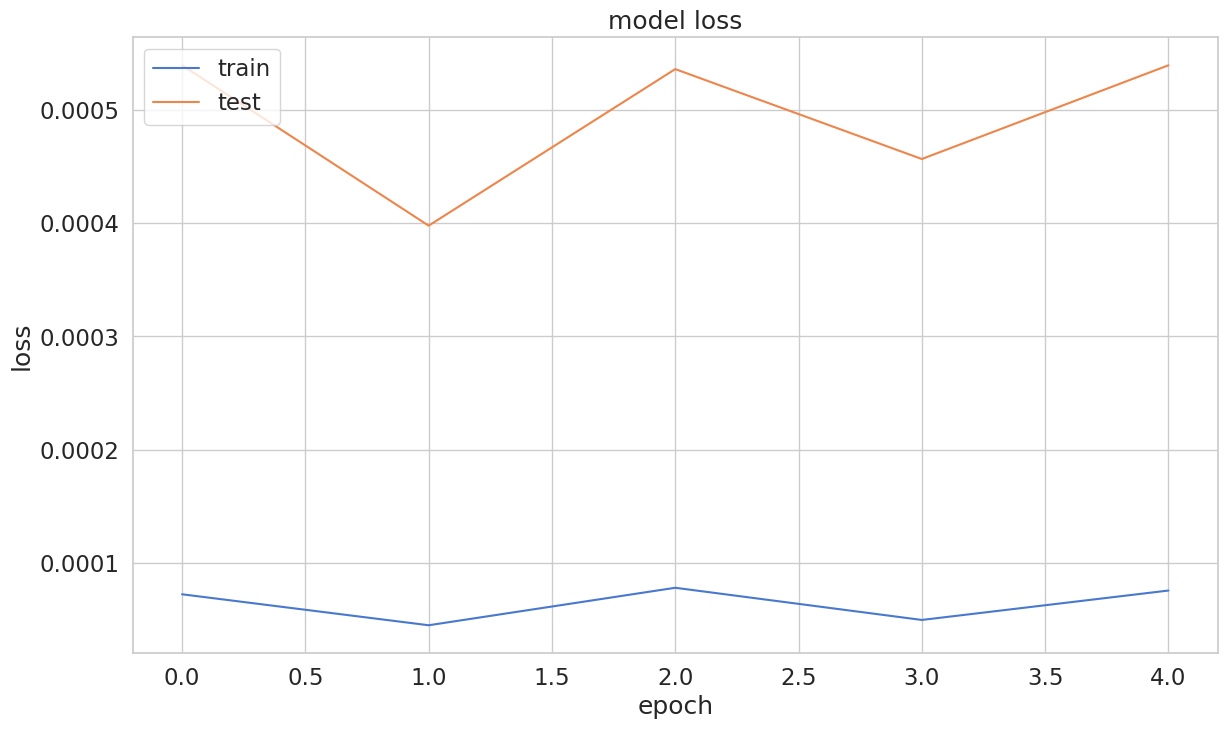

In [29]:
BATCH_SIZE = 32
history = model.fit( X_train, y_train, epochs=5, batch_size=BATCH_SIZE,shuffle=False, validation_split=0.001)
model.evaluate(X_test, y_test)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

20/20 [==============================] - 0s 19ms/step


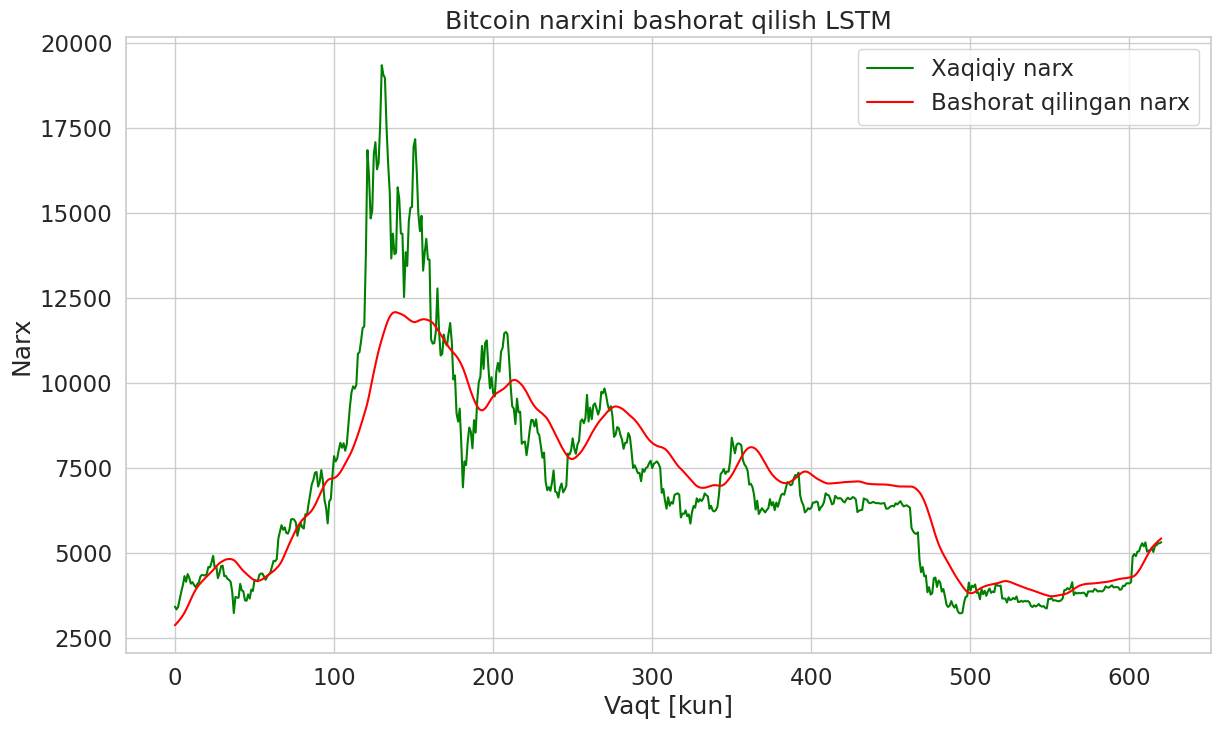

In [23]:
y_hat = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
plt.plot(y_test_inverse, label='Xaqiqiy narx', color='green')
plt.plot(y_hat_inverse, label='Bashorat qilingan narx', color='red')
plt.title('Bitcoin narxini bashorat qilish LSTM')
plt.xlabel('Vaqt [kun]')
plt.ylabel('Narx')
plt.legend(loc='best')
plt.show();

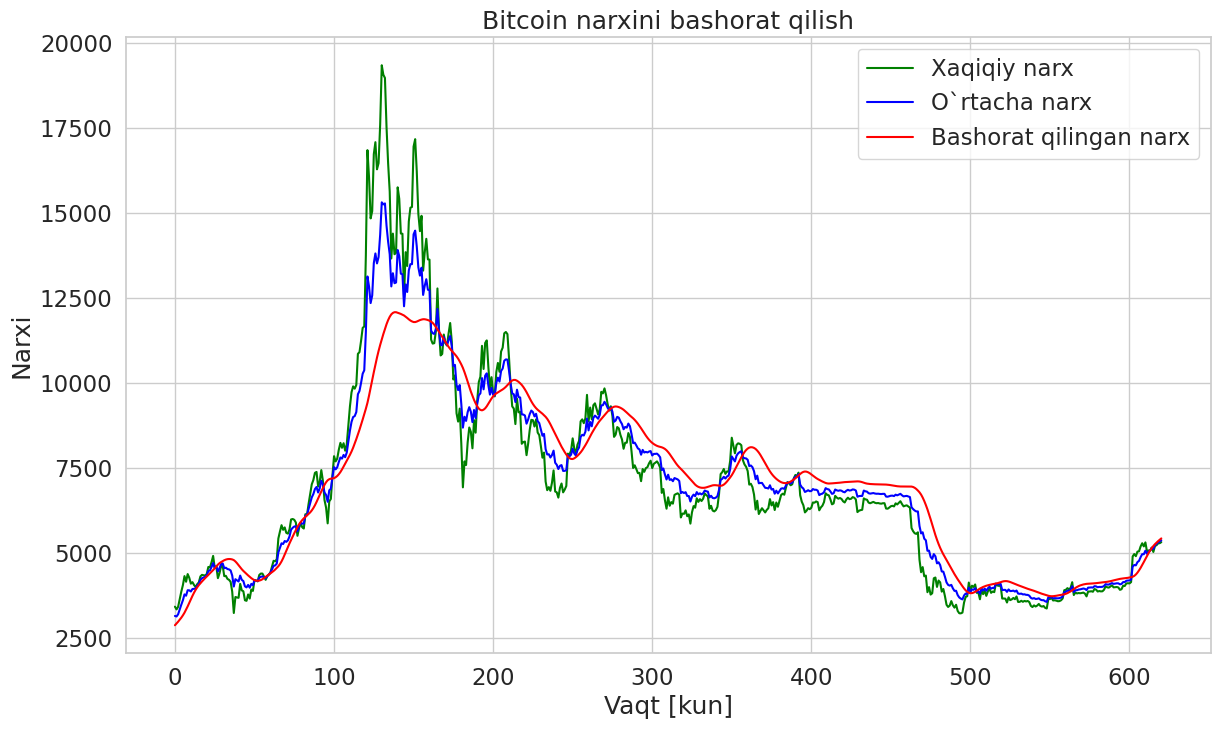

In [24]:
error= abs(y_test_inverse+y_hat_inverse)/2
plt.plot(y_test_inverse, label='Xaqiqiy narx', color='green')
plt.plot(error, label='O`rtacha narx', color='blue')
plt.plot(y_hat_inverse, label='Bashorat qilingan narx', color='red')
plt.title('Bitcoin narxini bashorat qilish')
plt.xlabel('Vaqt [kun]')
plt.ylabel('Narxi')
plt.legend(loc='best')
plt.show();

In [30]:
df

,Date,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.049510,0.049510,0.049510,0.049510,0
1,2010-07-17,0.085850,0.059410,0.085840,0.085840,5
2,2010-07-18,0.093070,0.077230,0.080800,0.080800,49
3,2010-07-19,0.081810,0.074260,0.074740,0.074740,20
4,2010-07-20,0.079210,0.066340,0.079210,0.079210,42
...,...,...,...,...,...,...
3196,2019-04-16,5270.759766,5190.810059,5236.259766,5236.259766,194699629
3197,2019-04-17,5317.779785,5232.990234,5289.750000,5289.750000,187312150
3198,2019-04-18,5353.009766,5212.180176,5295.529785,5295.529785,158699049
3199,2019-04-19,5366.600098,5274.450195,5326.180176,5326.180176,123577001
